In [1]:
getwd()

[1] "C:/Users/luzsa/OneDrive/Documents/GitHub/Andrino_DSPN_S26/ExerciseSubmissions"

In [20]:
library(tidyverse)


# Exercise 4: Data cleansing

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data.

In [21]:
setwd("C:/Users/luzsa/OneDrive/Documents/GitHub/Andrino_DSPN_S26")


In [22]:
lex<-read.csv("LexicalData_toclean.csv")

In [23]:
head(lex)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


In [31]:
#rid of the commas in reaction time andmake it numeric
#rid of rows with n/a reaction times
#postive reaction times
lex_clean <- lex_clean %>%
    mutate(D_RT = as.numeric(gsub(",", "", D_RT))) %>%
    filter(!is.na(D_RT)) %>% 
    filter(D_RT > 0)  

For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing.

> * First action: Syntactical anomaly-domain format error
> * Second action: coverage anomlay-missing values
> * Third action: semantic  anomaly-integrity constraint violation

In [32]:
summarise(lex_clean)

1

In [33]:
lex_clean %>%
    summarise(
        num_observ = n(),
        mean_rt = mean(D_RT),
        sd_rt = sd(D_RT)
    )

num_observ,mean_rt,sd_rt
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


In [35]:
lex_clean <- lex_clean %>%
  mutate(Trial_0 = Trial - 1)

In [37]:
head(lex_clean)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Trial_0
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,0
2,67,1,1,1094,refrigerant,false,0.825,0
3,120,1,1,587,gaining,false,-0.645,0
4,21,1,1,984,cheerless,false,0.025,0
5,236,1,1,577,pattered,false,-0.763,0
6,236,2,1,715,conjures,false,-0.364,1


In [38]:
names(lex_clean)

[1] "Sub_ID"   "Trial"    "Type"     "D_RT"     "D_Word"   "Outlier"  "D_Zscore"
[8] "Trial_0"

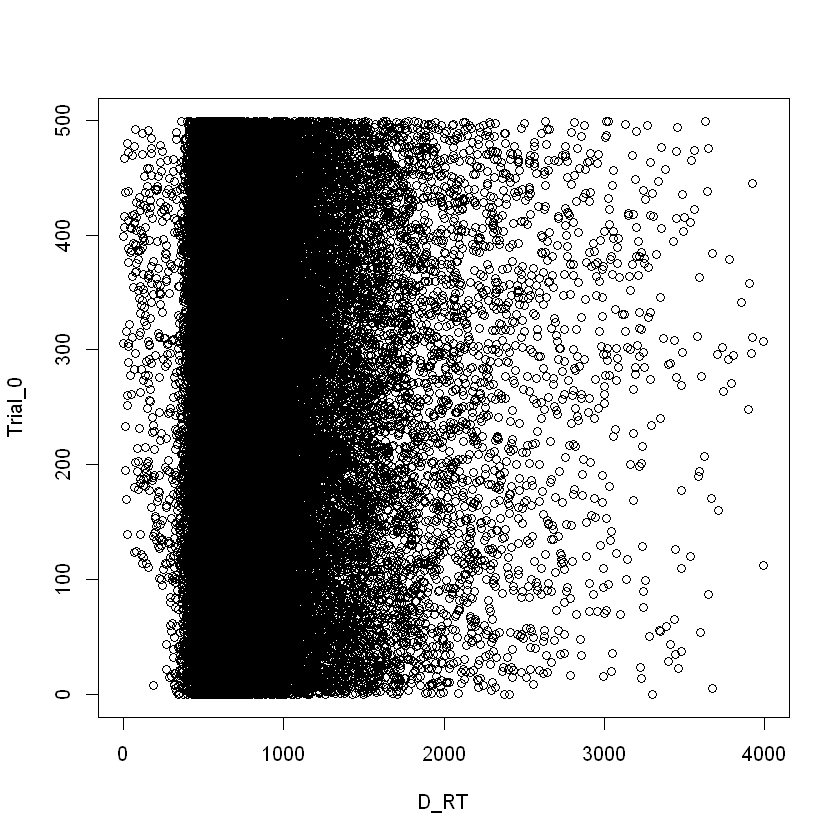

In [41]:
lex_clean %>%
  plot(Trial_0 ~ D_RT, data = .) #data = . tells me that the function "will use the piped data as the dataset"